<a href="https://colab.research.google.com/github/youse0ng/AICE_/blob/main/AICE_05_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지표로 데이터 탐색하기

탐색적 데이터 분석은 데이터를 탐색하고 이해하는 것으로 시작한다.

변수를 기준으로 1개의 변수만 분석하는 일변량 분석과 2개 이상의 변수 간의 관계를 분석하는 다변량 분석으로 나눠 데이터를 탐색하는 방법을 알아보자.


### 일변량 비시각화 탐색하기

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Clean_Dataset.csv")

df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [76]:
df.drop([df.columns[0]],inplace=True,axis=1)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


#### 요약 통계량 확인하기 `describe(include='all')

In [77]:
# 수치형 데이터의 요약 통계량 확인하기
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [78]:
# 모든 칼럼에 대한 요약 통계량 확인하기
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


- 1. unique: 범주의 갯수
- 2. top: 최빈값
- 3. freq: 해당 칼럼에서 최빈값이 존재하는 갯수

#### 빈도표 확인하기 (value_counts())

범주형 데이터의 경우 빈도표, 빈도밀도 등을 구해서 추가데이터를 탐색할 수 있다.

`value_counts` 메소드를 사용하면 각 칼럼의 빈도를 보여주어

오입력 데이터나 무입력 데이터 등도 빠르게 확인할 수 있다.

범주형 데이터 탐색에 많이 사용됨



In [79]:
#airline,source_city,destination_city의 빈도표 확인

print(df['airline'].value_counts())
print(df['source_city'].value_counts())
print(df['destination_city'].value_counts())

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64


### 다변량 비시각화 탐색하기




#### 상관계수 확인하기 df.corr()

두 변수 간의 선형 상관관계를 계량화한 수치

[-1,+1] 사이의 값을 가지며 -1에 가까울수록 음의 상관관계,

+1에 가까울수록 양의 상관관계를 의미.

주의할 점은 -1에 가까울수록 두 변수가 상관관계가 없는 것이 아니라

0에 가까울수록 두 변수가 상관관계가 없다는 점이다.

- 양의 상관관계: 두 변량 x와 y가 어떤 한 값이 커짐에 따라 다른 값도 같이 점차적으로 커지는 상관관계를 말한다.

- 음의 상관관계: 어떤 두 변량이 있을 때, 한쪽이 증가하면 한쪽이 감소하는 경향을 갖는 관계를 음의 상관관계라고 한다. 즉, 어떤 두 변량을 x, y로 정의할 경우 x값이 커짐에 따라 y값이 작아지는 관계를 말한다.

다음 항공권 가격 예측 데이터의 칼럼 간의 상관관계를 확인해보자

In [80]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


- 비행시간(duration)과 항공권 가격(price)은 약한 양의 상관관계를 보임

- 출발까지 남은 일자(dats_left)와 항공권 가격(price)는 음의 상관관계를 보이지만, 0에 가까워서 상관관계가 없다고 봐도됨.

하지만 단순히 데이터만 봐서는 정확하게 이해할 수 없다. 앞에서 출발까지 남은 일자와 항공권 가격 간의 상관관계가 없다고 밝혔지만,

좀더 생각해보면, 항공권에는 좌석등급이라는 가격을 결정하는 주요 원인이 존재한다.

한번 코드로 확인해보자.

In [81]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [82]:
df_economy=df[df['class']=='Economy'] # class==Economy에 한정하기
print(type(df['class']=='Economy')) # Series
df_economy

<class 'pandas.core.series.Series'>


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
206661,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697
206662,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709
206663,Vistara,UK-826,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640
206664,Vistara,UK-822,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640


In [83]:
df_economy.corr()

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


위에서는 출발까지 남은기한(days_left)와 price 간의 상관관계가 없다고 판단하였지만,

Economy (class) 변수에 대해 고려를 하니, -0.55로 음의 상관관계가 나타났다.

즉, 빨리 구매할 수록 가격이 낮아지고, 출발 일자에 가까울수록 가격이 높아지는 것을 알 수 있다.

다양한관점을 통해 데이터를 확인하기 위해서는 도메인 지식이 필요함을 알 수 있다.


#### 교차표 확인하기 crosstab()

상관계수가 수치형 데이터의 상관관계를 이해하는 데 사용되었다면,

교차표는 두 범주형 데이터의 상관관계를 확인하는 방법이다.

출발 도시별로 어느 시간에 비행기 이륙이 많은지,

출발 도시와 출발 시간의 관계를 살펴보자

source_city와 departure_time간의 관계

pandas의 crosstab 함수를 이용한다.




In [84]:
pd.crosstab(df['source_city'],df['departure_time'])

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


## 시각화로 데이터 탐색하기

데이터의 시각화는 방대한 양의 데이터를 빠르게 확인하고 유의미한 특성을 찾아내는 중요한 작업으로 데이터를 이해하고 분석하는 데 여러 가지 용도로 사용됩니다.

ex)
1. 전체적인 데이터의 구조를 시각적으로 분석하거나 방향을 가늠

2. 잘못 처리된 데이터가 존재하는지를 확인해서 수정하는데 도움

3. 분석 및 모델링의 결과를 이해하고 의사 결정에 반영하기 쉽도록 보여줌

데이터 시각화 라이브러리
1.   matplotlib
  *   line plot(선 그래프)
  *   bar plot(막대 그래프)
  *   pie plot(파이 그래프)
  *   histogram(히스토그램)
  *   box plot(상자 그래프)
  *   scatter plot(산점도)


2.  seaborn

matplotlib 기반으로 만들어진 데이터 시각화 라이브러리
다양한 색상과 통계 기능을 제공한다.





### 일변량 시각화 탐색하기

figure,plot,show 3가지를 기억하면된다.

figure는 시각화하는 영역을 지정한다.

maplotlib.pyplot as plt로 선언하고 plt.figure로 사용합니다.

영역과 관련된 매개변수는 figure내에서 한다.



plot은 시각화 내용을 표기하며, 시각화에 사용할 plot의 형태와 매개변수 등에 따라 변경됩니다.

figure와 같은 방식으로 plt.plot으로 사용한다.



show는 시각화한 객체를 출력한다.
plt.show로 사용한다.

cell mode에서는 figure,show를 많이 생략하고 사용하기도 한다.



In [85]:
days_left=df.groupby('days_left').mean()
days_left.head()

,duration,price
days_left,,
1,14.250228,21591.867151
2,14.111080,30211.299801
3,14.287476,28976.083569
4,13.742667,25730.905653
5,12.921970,26679.773368


In [86]:
airline=df.groupby(['airline','departure_time']).mean()
airline.loc[['AirAsia','Air_India']]

duration  days_left         price
airline   departure_time                                    
AirAsia   Afternoon        8.586114  27.766407   4342.759584
          Early_Morning    9.196701  27.134886   4527.002979
          Evening          9.082658  27.176921   4058.764561
          Late_Night       5.228462  29.328671   4183.125874
          Morning          9.260336  27.347530   4132.566865
          Night            8.759503  29.258491   3343.718239
Air_India Afternoon       15.240925  25.415410  23789.167617
          Early_Morning   14.571800  25.648513  23346.060200
          Evening         16.986395  25.622893  23366.248792
          Late_Night      12.967182  23.597938  26479.151203
          Morning         14.562493  26.034219  21747.785007
          Night           16.340012  24.500074  25968.716429

#### 1. 선 그래프(line graph)

시간이나 순서에 따른 데이터의 연속적인 변화량을 관찰할 때 주로 사용

증가와 감소에 대한 상태 변화를 파악하는데 유용

예를 들어, 시간에 따른 기온변화, 환율 변동, 전염병 환자 발생 추이 등을 쉽게 확인

출발까지 남은 일자(days_left)에 따라 항공권 가격(price)에 대한 변화를 시각화 해보자.



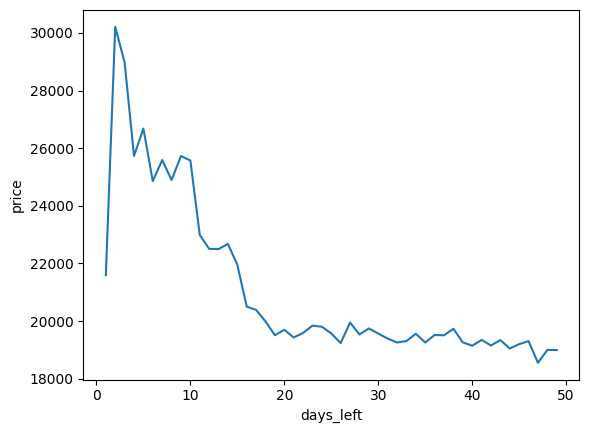

In [87]:
import matplotlib.pyplot as plt

# 시각화 영역(figure) 지정
plt.figure()

# days_left의 price 데이터로 선 그래프 그리기
plt.plot(days_left['price'])

# x축 이름 정하기
plt.xlabel('days_left')
# y축 이름 정하기
plt.ylabel('price')
# 시각화 표기하기
plt.show()

days_left마다 price가격

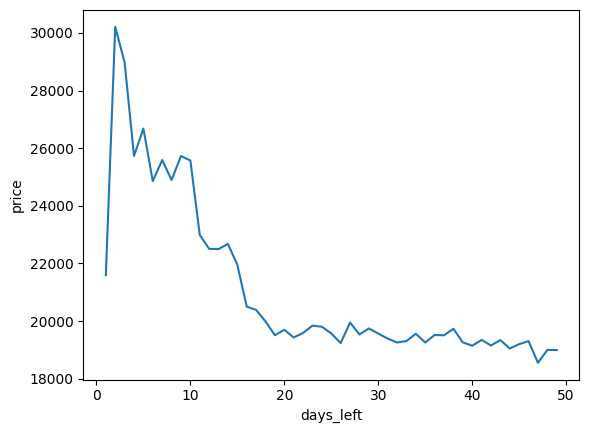

In [88]:
group=df.groupby('days_left').mean()

plt.figure()
plt.plot(group['price'])
plt.xlabel('days_left')
plt.ylabel('price')
plt.show()

출발까지 남은 일자가 많을수록, 가격이 저렴해지고, 출발일에 가까워질수록 비싸다는 사실을 확인할 수 있다.

#### 막대 그래프(bar plot)

**`plt.bar`**

범주에 대한 통계 데이터나 양을 막대 모양으로 나타내는 그래프

각 항목의 수량을 한눈에 파악하기 쉬움.

가로 세로 누적 그룹화된 막대 그래프를 사용할 수 있다.

막대 그래프를 사용하여 항공사별 평균 항공권 가격을 비교해보자.



In [89]:
# 먼저 항공사별 평균 항공권 가격 데이터를 만들자

airline=df.groupby(['airline']).mean()
airline

,duration,days_left,price
airline,,,
AirAsia,8.941714,27.735184,4091.072742
Air_India,15.504235,25.497466,23507.019112
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
SpiceJet,12.579767,24.122850,6179.278881
Vistara,13.326634,25.894532,30396.536302


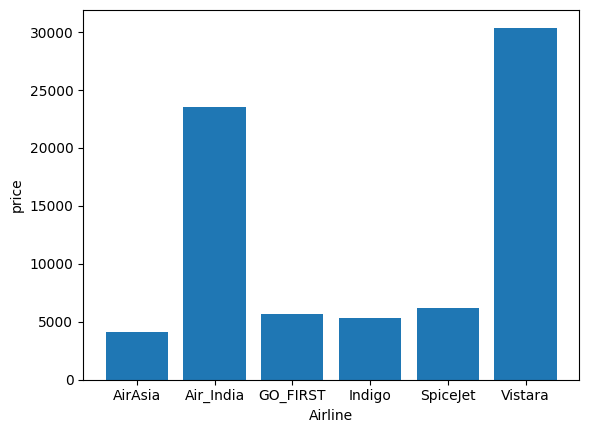

In [90]:
# 인덱스를 리스트로 만들기

label=airline.index
plt.figure()

# 인덱스를 X, 평균 가격을 Y로 하는 막대 그래프 그리기
plt.bar(x=label,height=airline['price'])
plt.xlabel("Airline")
plt.ylabel('price')
plt.show()

Air_India와 Vistara 항공사가 다른 항공사에 비해 가격이 비싸다는 것을 단번에 확인할 수 있다.

항공사 별 + 출발 시간별 flight 건수

In [91]:
arrival_time_per_airline=df.groupby(['airline','arrival_time']).count()
arrival_time_per_airline

flight  source_city  departure_time  stops  \
airline   arrival_time                                                
AirAsia   Afternoon        2052         2052            2052   2052   
          Early_Morning    1407         1407            1407   1407   
          Evening          2762         2762            2762   2762   
          Late_Night       3491         3491            3491   3491   
          Morning          2909         2909            2909   2909   
          Night            3477         3477            3477   3477   
Air_India Afternoon       11576        11576           11576  11576   
          Early_Morning    3405         3405            3405   3405   
          Evening         18748        18748           18748  18748   
          Late_Night       2090         2090            2090   2090   
          Morning         20521        20521           20521  20521   
          Night           24552        24552           24552  24552   
GO_FIRST  Afternoon        3373         3373            3373   3373   
          Early_Morning    2705         2705            2705   2705   
          Evening          4503         4503            4503   4503   
          Late_Night       2778         2778            2778   2778   
          Morning          2761         2761            2761   2761   
          Night            7053         7053            7053   7053   
Indigo    Afternoon        7367         7367            7367   7367   
          Early_Morning    2537         2537            2537   2537   
          Evening         11591        11591           11591  11591   
          Late_Night       3455         3455            3455   3455   
          Morning          5469         5469            5469   5469   
          Night           12701        12701           12701  12701   
SpiceJet  Afternoon         844          844             844    844   
          Early_Morning     721          721             721    721   
          Evening          1403         1403            1403   1403   
          Late_Night        456          456             456    456   
          Morning          2525         2525            2525   2525   
          Night            3062         3062            3062   3062   
Vistara   Afternoon       12927        12927           12927  12927   
          Early_Morning    4642         4642            4642   4642   
          Evening         39316        39316           39316  39316   
          Late_Night       1731         1731            1731   1731   
          Morning         28550        28550           28550  28550   
          Night           40693        40693           40693  40693   

                         destination_city  class  duration  days_left  price  
airline   arrival_time                                                        
AirAsia   Afternoon                  2052   2052      2052       2052   2052  
          Early_Morning              1407   1407      1407       1407   1407  
          Evening                    2762   2762      2762       2762   2762  
          Late_Night                 3491   3491      3491       3491   3491  
          Morning                    2909   2909      2909       2909   2909  
          Night                      3477   3477      3477       3477   3477  
Air_India Afternoon                 11576  11576     11576      11576  11576  
          Early_Morning              3405   3405      3405       3405   3405  
          Evening                   18748  18748     18748      18748  18748  
          Late_Night                 2090   2090      2090       2090   2090  
          Morning                   20521  20521     20521      20521  20521  
          Night                     24552  24552     24552      24552  24552  
GO_FIRST  Afternoon                  3373   3373      3373       3373   3373  
          Early_Morning              2705   2705      2705       2705   2705  
          Evening                    4503   4503      4503    

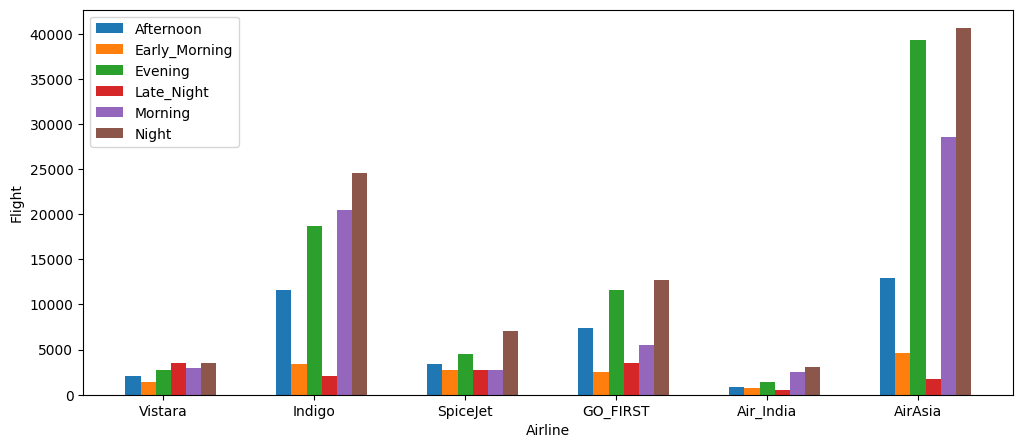

In [92]:
# 항공사 별 + 출발 시간별 flight 건수

airline_list=list(set(df['airline'].values)) # [AirAsia, Air_india, Go_First,...] 항공사 이름
arrival_time=list(set(df['arrival_time'].values)) # [afternoon,Early_Morning,Evening,Late_night,...,Night]
value_for_arrival_time=arrival_time_per_airline['flight'].values # [2052, 1407, 2762, 3941, 2909, 3477, 11576.....]

arrival_time_per_airline['flight']
Afternoon=[value_for_arrival_time[i] for i in range(0,len(value_for_arrival_time),6)]
Early_Morning=[value_for_arrival_time[i] for i in range(1,len(value_for_arrival_time),6)]
Evening=[value_for_arrival_time[i] for i in range(2,len(value_for_arrival_time),6)]
Late_Night=[value_for_arrival_time[i] for i in range(3,len(value_for_arrival_time),6)]
Morning=[value_for_arrival_time[i] for i in range(4,len(value_for_arrival_time),6)]
Night=[value_for_arrival_time[i] for i in range(5,len(value_for_arrival_time),6)]

x=airline_list # [AIR_ASIA,AIR_INDIA,GO_FIRST,...VISTARA]
x_axis=np.arange(len(x))
plt.figure(figsize=(12,5))
plt.bar(x_axis-0.2,Afternoon,0.1,label='Afternoon')
plt.bar(x_axis-0.1,Early_Morning,0.1,label='Early_Morning')
plt.bar(x_axis,Evening,0.1,label='Evening')
plt.bar(x_axis+0.1,Late_Night,0.1,label='Late_Night')
plt.bar(x_axis+0.2,Morning,0.1,label='Morning')
plt.bar(x_axis+0.3,Night,0.1,label='Night')
plt.legend()
plt.xticks(x_axis,x)
plt.ylabel('Flight')
plt.xlabel('Airline')
plt.show()

#### 파이 그래프(Pie plot)

**빈도값(`value_counts()`) -> 파이 그래프 (`plt.pie()`)**


전체에 대한 각 부분의 비율을 부채꼴 모양으로 나타낸 그래프

점유율, 투표율, 구성 비율 등을 쉽게 비교 가능

출발 시간에 따른 비행기 스케쥴을 확인해 봅니다.

plt.figure 내 figsize 파라미터를 이용해서 그래프의 크기를 조절할 수 있다.

또한 plt.pie를 사용할 때, labels 값을 지정해 주지 않으면, 아무런 정보가 없는 그래프만 나오므로 참고합니다.



In [93]:
df['departure_time'].value_counts()
# 범주형 데이터인 departure_time 의 범주의 개수 구하기

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
<class 'pandas.core.series.Series'>


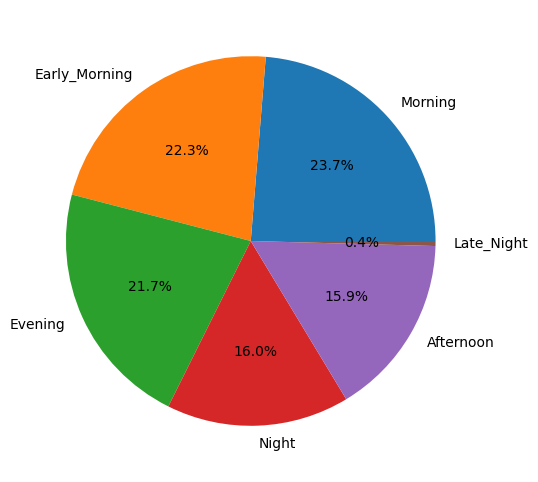

In [94]:
# 출발 시간에 따른 비행기 스케쥴을 확인
# value_counts() 빈도값 계산
departure_time=df['departure_time'].value_counts()
print(departure_time)
print(type(departure_time))

plt.figure(figsize=(10,6))

# departure_time 빈도표 데이터로 파이 그래프 그리기
plt.pie(x=departure_time,labels=departure_time.index,autopct='%.1f%%') # 내부의 부분 비율을 소수점 한자리로 표현)
plt.show()

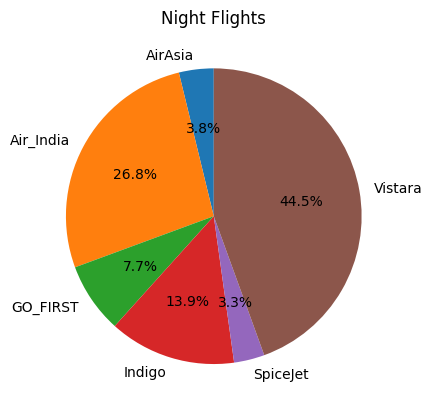

In [95]:
airline_night=pd.crosstab(df['airline'],df['arrival_time'])
airline_night=airline_night.loc[airline_night.index,'Night']
plt.figure()
plt.pie(airline_night,labels=airline_night.index,autopct='%.1f%%',startangle=90,)
plt.title('Night Flights')
plt.show()

arrival_time
Afternoon        11576
Early_Morning     3405
Evening          18748
Late_Night        2090
Morning          20521
Night            24552
Name: Air_India, dtype: int64


([<matplotlib.patches.Wedge at 0x20c11794588>,
 [Text(-0.5215001203195373, 1.0807578935666897, 'Afternoon'),
  Text(-1.0296171044326141, 0.6163510511549399, 'Early_Morning'),
  Text(-1.2336178340709623, -0.41010613194887485, 'Evening'),
  Text(-0.5117412830087648, -1.0854127598589134, 'Late_Night'),
  Text(0.5084931267104349, -1.0869382411564357, 'Morning'),
  Text(0.9785516867120079, 0.6945765590869625, 'Night')],
 [Text(-0.30420840351973005, 0.630442104580569, '14.3%'),
  Text(-0.6006099775856916, 0.3595381131737149, '4.2%'),
  Text(-0.7591494363513615, -0.25237300427623066, '23.2%'),
  Text(-0.2985157484217794, -0.6331574432510328, '2.6%'),
  Text(0.296620990581087, -0.634047307341254, '25.4%'),
  Text(0.5708218172486712, 0.4051696594673947, '30.4%')])

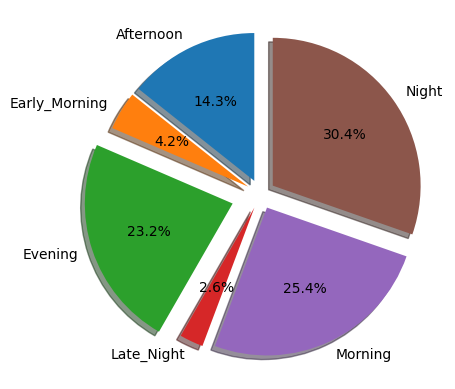

In [96]:
Air_india=pd.crosstab(df['airline'],df['arrival_time']).loc['Air_India']
print(Air_india)
plt.pie(x=Air_india,startangle=90,counterclock=1,labels=Air_india.index,autopct='%.1f%%',shadow=True,explode=[0.1,0.1,0.2,0.1,0.1,0.1])

Morning 시간대에 제일 많이 출발, Late_Night이 제일 스케쥴이 적음

#### 히스토그램(Histogram)

 **`plt.hist`**

특정 데이터의 빈도수를 막대 모양으로 표시한 그래프입니다.

히스토그램이 가장 많이 사용되는 통계 분석 도구

가로축에는 계급 (보통, 변수의 구간을 사용 : 인접하되 겹치지 않아야함)

세로축에는 도수

데이터의 특성과 분포를 파악하는 역할을 하며 빈도, 빈도 밀도, 확률 등의 분포를 그릴 때 사용






목적지까지 소요 시간의 분포를 확인해보자

그전에, plt.hist() 메소드의 bins 파라미터를 알아야한다.

bins는 계급을 몇 개의 구간을 나눌지를 지정하며 기본값은 10

비행시간(duration) 데이터의 bins를 10과 20으로 설정하고 시각화해서 비교해보자.



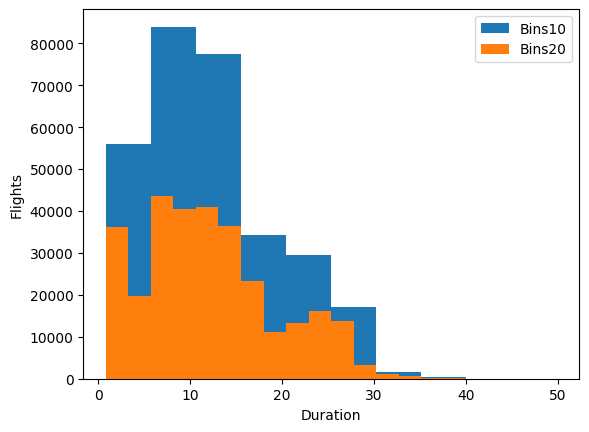

In [97]:
plt.figure()

# duration을 10개 구간으로 나눠서 히스토그램 그리기
plt.hist(df['duration'],bins=10)

# duration을 20개 구간으로 나눠서 히스토그램 그리기
plt.hist(df['duration'],bins=20)
plt.xlabel('Duration')
plt.ylabel('Flights')
plt.legend(('Bins10',"Bins20"))
plt.show()

#### 상자 그래프(box plot)

https://www.youtube.com/watch?v=Wuk17zg-jt8

상자그래프에 대한 이해를 위한 강의


##### matplotlib의 상자그래프

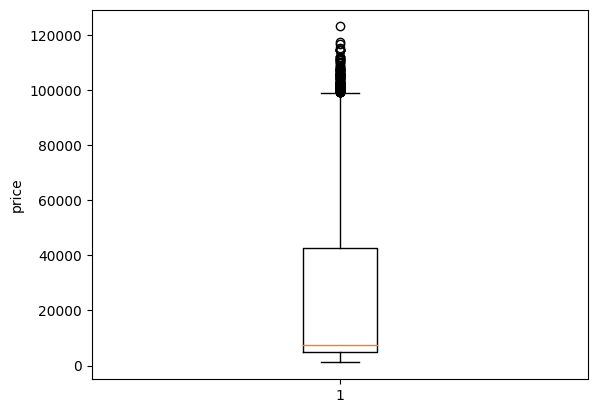

In [98]:
plt.figure()

# Price 칼럼에 대한 상자그래프 그리기
plt.boxplot(list(df['price']))
plt.ylabel("price")
plt.show()

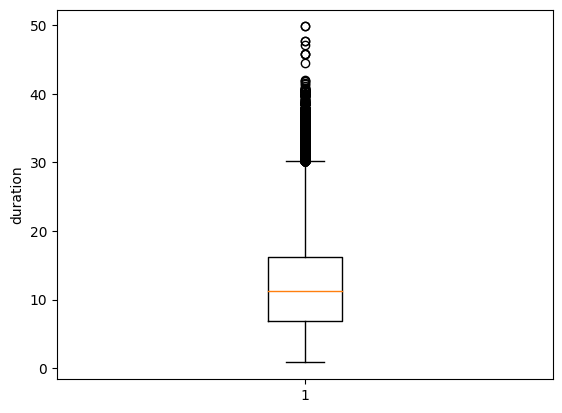

In [99]:
# duration의 이상치 탐지
plt.figure()

# duration의 상자 그래프 그리기
plt.boxplot(df['duration'])
plt.ylabel("duration")
plt.show()

##### pandas의 상자그래프

by=x축에 해당하는 칼럼명

column=분포를 확인하고 싶은 칼럼명



<AxesSubplot:title={'center':'price'}, xlabel='departure_time'>

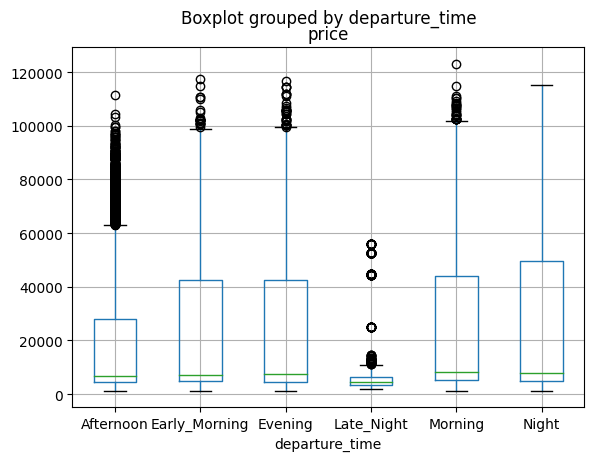

In [100]:
df.boxplot(by='departure_time',column='price')

<AxesSubplot:title={'center':'price'}, xlabel='class'>

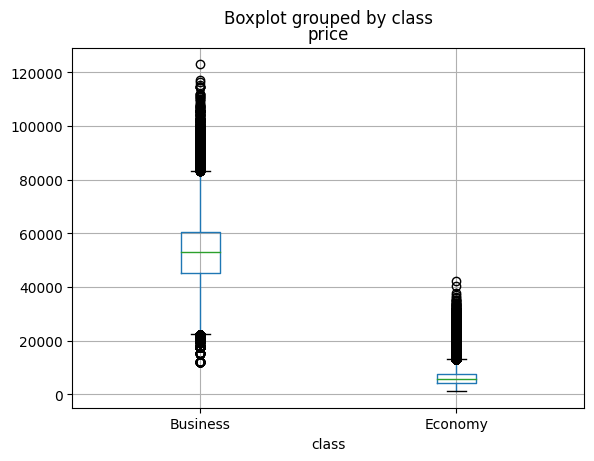

In [101]:
# class 그룹별 가격에 대한 box 플롯
df.boxplot('price','class')

### 다변량 시각화 탐색하기


#### 산점도(scatter plot)
plt.scatter()


2개의 연속형 변수의 관계를 보기 위해 X축과 Y축에 표시하는 점들을 찍어서 만드는 그래프입니다.

예를 들어, 키와 몸무게같은 두 변수의 상관관계를 대략적으로 파악할 수 있다.


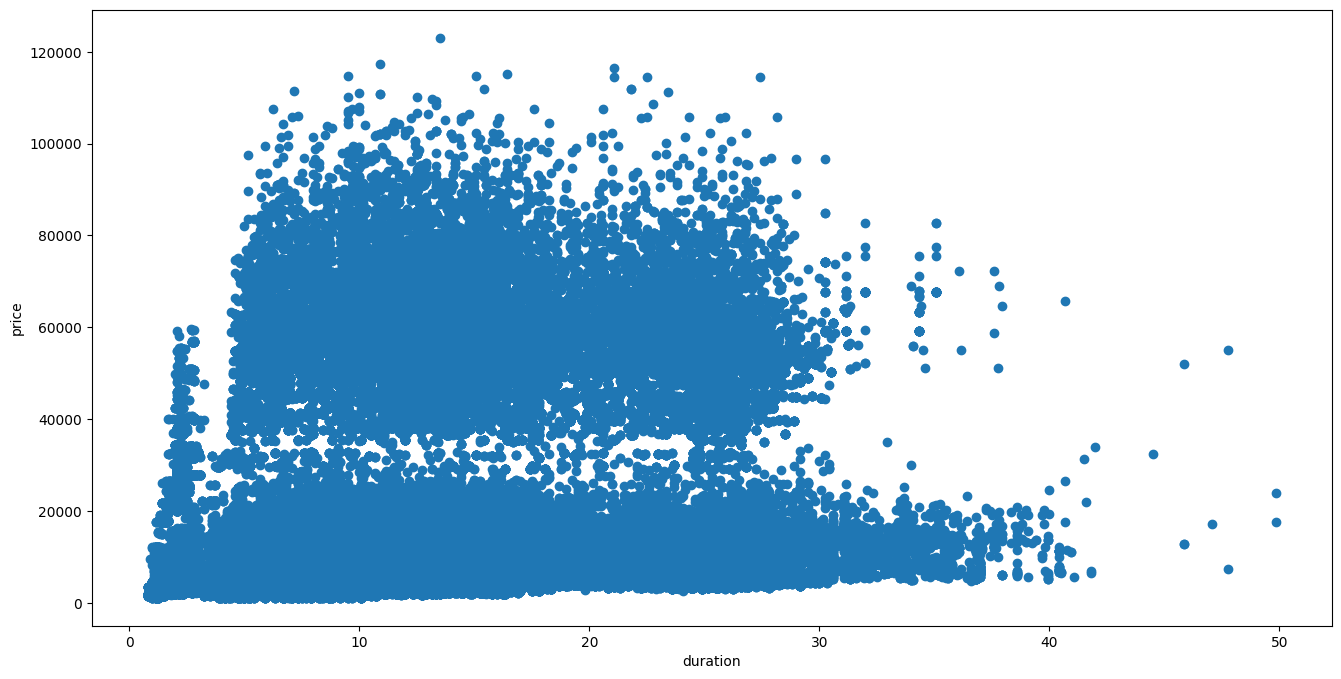

In [102]:
# 비행시간(duration)과 항공 가격(price)의 관계를 알아보자.
plt.figure(figsize=(16,8))

plt.scatter(y=df["price"],x=df["duration"])
plt.xlabel("duration")
plt.ylabel("price")
plt.show()

이해하기 좀 난해하다.

좌석 등급 칼럼은 Business와 Economy 값으로 구성되며 좌석 등급 전체에 대한 산점도를 그려 흐름을 확인하기가 어렵다..

Economy만을 한정해서 산점도를 파악해보자
(df_economy)

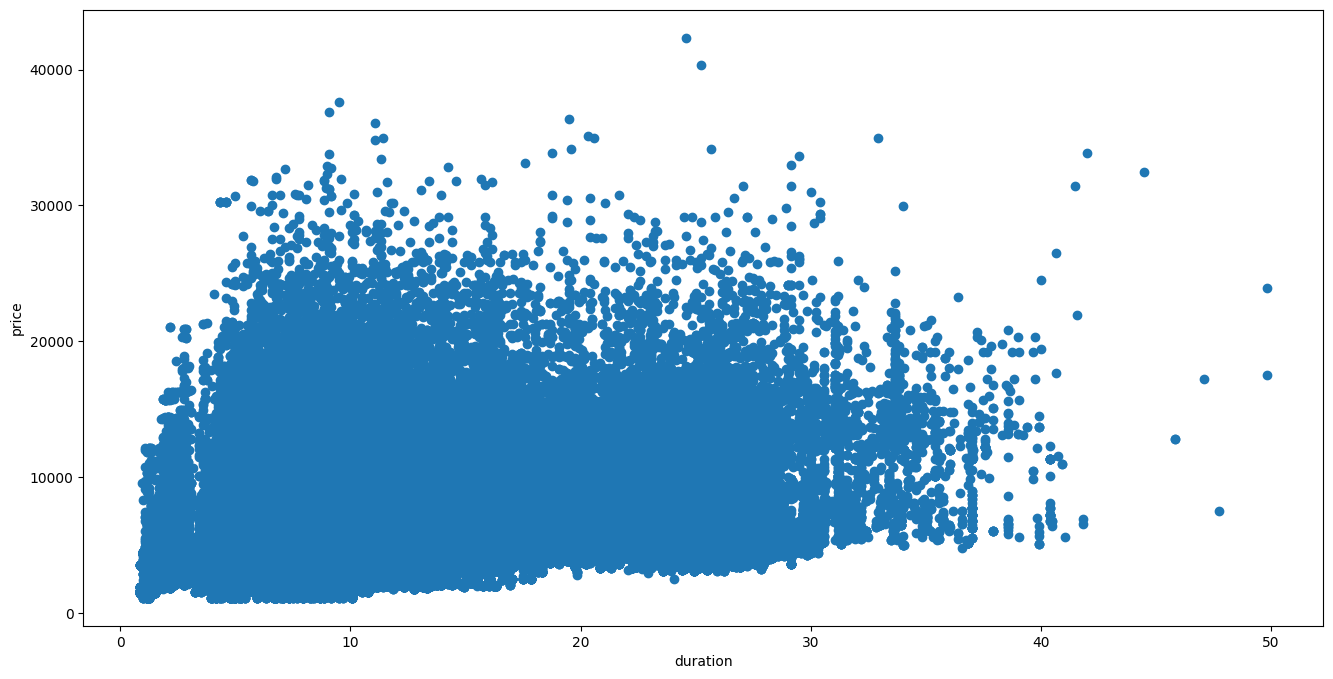

In [103]:
plt.figure(figsize=(16,8))

plt.scatter(x=df_economy["duration"],y=df_economy["price"])
plt.xlabel("duration")
plt.ylabel("price")
plt.show()

약한 양의 상관관계를 확인할 수 있다..


#### 히트맵(heatmap)

plt.pcolor() 하지만 seaborn의 히트맵을 사용하는걸 권장

두 값 또는 각 칼럼 간의 상관관계를 나타낼 때 사용

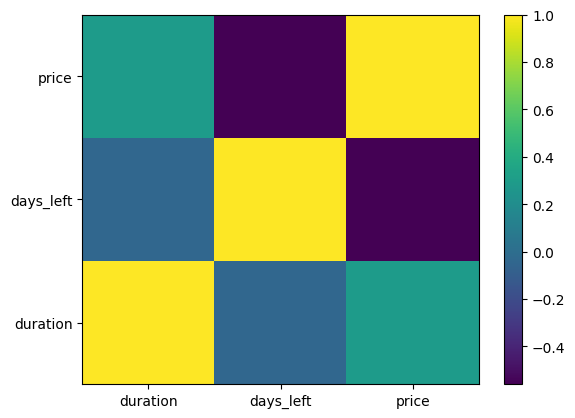

In [104]:
import numpy as np

#상관계수 데이터
heat=df_economy.corr()

#상관계수로 히트맵만들기
plt.pcolor(heat)

#x축 항목 정보 표기하기
plt.xticks(ticks=np.arange(0.5,len(heat.columns),1),labels=heat.columns)

#y축 항목 정보 표기하기
plt.yticks(np.arange(0.5,len(heat.index),1),heat.index)

# 히트맵 확인을 위한 칼러바 표시
plt.colorbar()
plt.show()

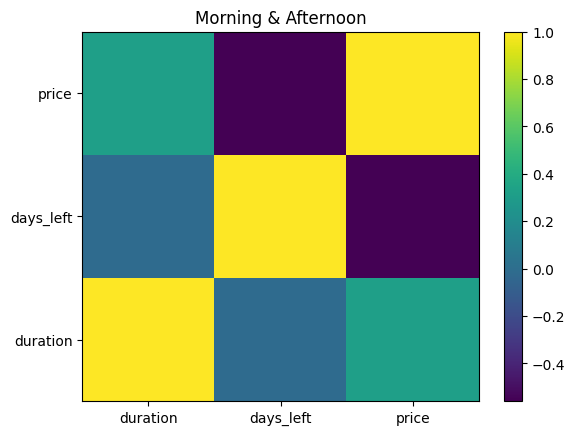

In [105]:
# arrival_time 도착 시간이 아침과 오후인 flight의 상관관계
df_morning_afternoon=df_economy[(df_economy['arrival_time']=='Morning') | (df_economy['arrival_time']=='Afternoon')]
corr=df_morning_afternoon.corr()

plt.pcolor(corr)
plt.title("Morning & Afternoon")
plt.xticks(np.arange(0.5,len(corr.index),1),labels=corr.index)
plt.yticks(np.arange(0.5,len(corr.columns),1),labels=corr.columns)
plt.colorbar()
plt.show()


Text(0.5, 1.0, 'Duration, Days_Left, Price')

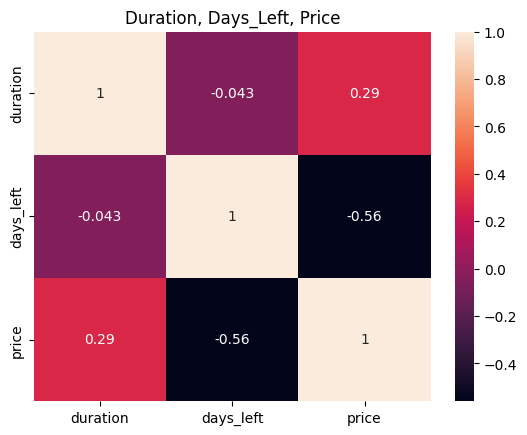

In [106]:
import seaborn as sns

sns.heatmap(heat,annot=True)
plt.title('Duration, Days_Left, Price')

### seaborn 라이브러리 활용하기




#### 범주형 산점도(categorical plot)

sns.caplot()

범주형 데이터와 수치형 데이터의 관계를 시각화할 수 있는 그래프

파라미터

데이터 하위 집합에 대해 정의 하나의 그래프내에 표현하는지 여러개의 그래프로 나눠서 표현하는지 차이
- row
- col
- hue

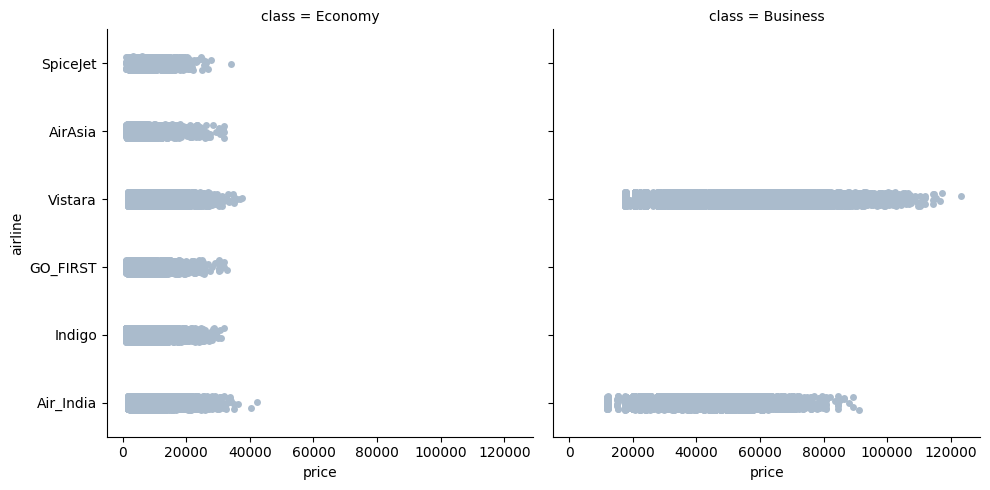

In [107]:
# seaborn 불러오기

import seaborn as sns

# airline별 price를 class로 구분하여 시각화하기
sns.catplot(y='airline',x='price',col='class',data=df,color='#aabbcc')

#### 선형 회귀 모델 그래프 (linear model plot)

sns.lmplot()

선형 회귀 모델과 연관 있는 함수로 일반적인 산점도와 함께 직선의 회귀선을 그려주기 때문에 특성간의 선형적인 관계를 확인하기 쉬운 그래프

이상치 데이터도 짐작할 수 있다.

파라미터

- line_kws : 회귀선의 색,형태,넓이 등 선에 대한 속성
- scatter_kws : 산점도에 대한 속성을 지정



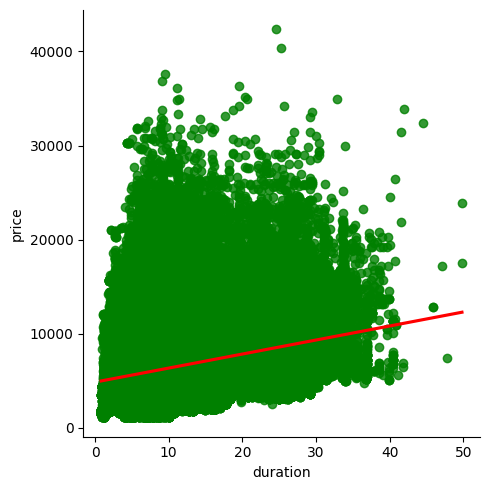

In [108]:
# duration과 price의 회귀선을 빨간색으로 표시해서 시각화
sns.lmplot(data=df_economy,x='duration',y='price',line_kws={'color':'red'},scatter_kws={'color':'green'})

#### 빈도 그래프(count plot)

sns.countplot()

seaborn의 시각화 함수는 대부분 hue 파라미터를 지원한다.

hue 파라미터를 사용하면 범례를 손쉽게 하나 추가할 수 있다.

범주형 데이터에 대하여 항목별 개수를 세어 막대 그래프를 그려준다.

각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있으며, 해당 특성을 구성하고 있는 값(value)를 구분해서 보여줌


<AxesSubplot:xlabel='airline', ylabel='count'>

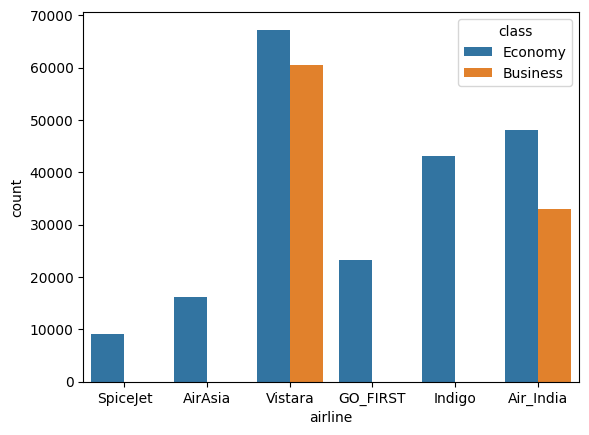

In [109]:
# 항공사별 비행 편수 class 별로 시각화하기
sns.countplot(data=df,x='airline',hue='class')

#### 조인트 그래프(joint plot)

sns.jointplot()

파라미터
- kind: 중앙에 위치한 그래프의 종류를 scatter 뿐만 아니라 hex,reg,kde등으로 변경할 수 있다.
  - hex는 모자이크처럼 영역을 육각형 모양의 작은 조각으로 나눠 색의 음영으로 분포 밀도를 표현
  - reg는 산점도와 함께 회귀선을 그려준다
  - kde는 등고선 모양으로 보여준다.

중앙의 산점도와 그래프 가장자리에 히스토그램을 동시에 그려주는 그래프

데이터 분포와 상관관계를 한번에 볼 수 있지만, 수치형 데이터만 표현할 수 있다.

조인트 그래프를 사용하면 산점도로는 알 수 없었던 데이터 빈도 밀도를 통해 데이터의 분포를 확인 하기가 쉽다.



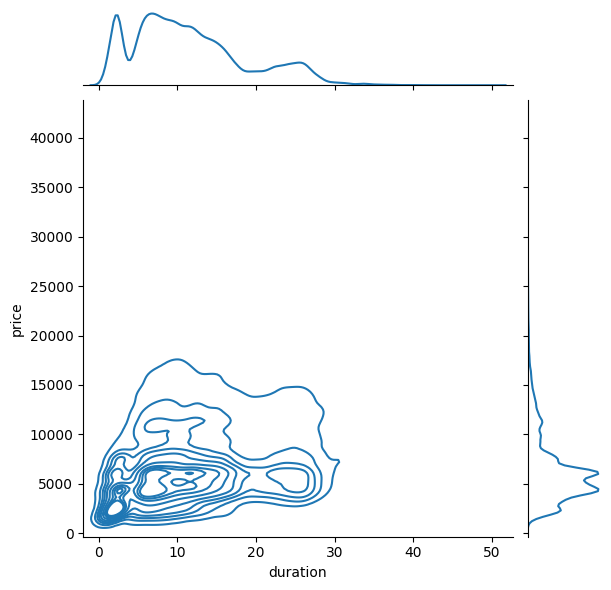

In [110]:
# 비행시간과 항공권 가격의 관계
sns.jointplot(x='duration',y='price',kind='kde',data=df_economy)

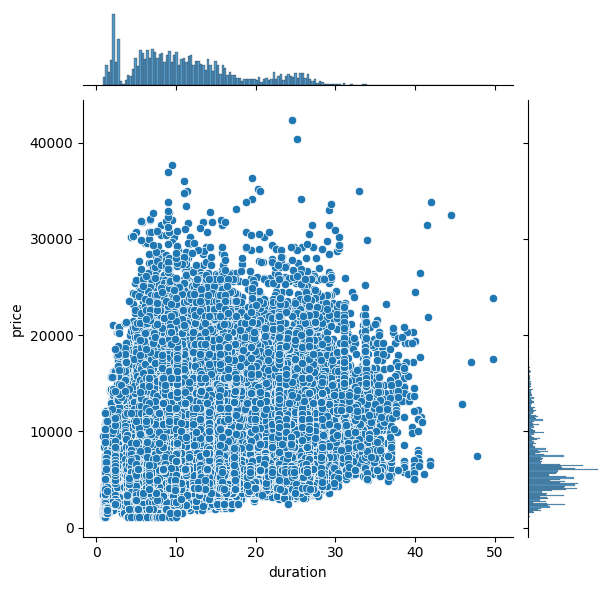

In [111]:
sns.jointplot(x='duration',y='price',data=df_economy)

비행시간은 대부분 0~20 사이에 분포하고

항공권 가격은 대부분 10000이하에 분포하고 있다는 사실을 알 수 있다.

#### 히트맵(heatmap)

sns.heatmap()
이것만 사용해도 x축 y축의 값과 칼러바를 표기하기 위해서 사용했던 추가 함수 없이 이해하기 쉬운 히트맵을 그려준다.

matplotlib에서도 다루었지만, 히트맵에서 중요한 것은 색상이다.

<AxesSubplot:>

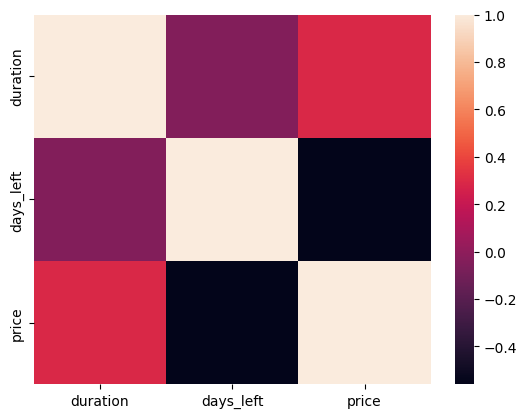

In [112]:
sns.heatmap(df_economy.corr())

# 대부분의 seaborn plot에서 사용할 수 있으며 손쉽게 범례를 하나 추가할 수 있는 파라미터는?



hue

# class `Economy`에 한정하여 항공권 가격 예측 데이터의 상관계수를 통해 히트맵을 그리시오.


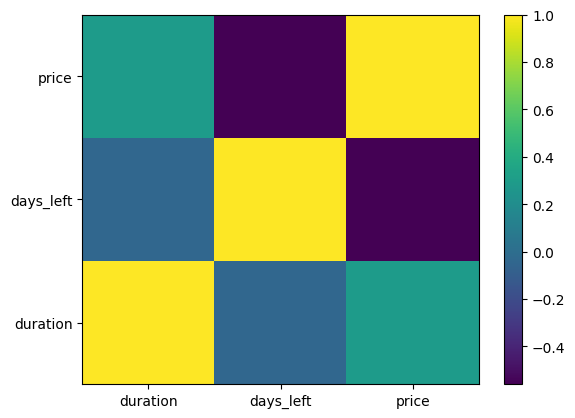

In [113]:
# matplotlib
df_eco=df[df['class']=='Economy']
heat=df_eco.corr()
plt.pcolor(heat)
plt.xticks(ticks=np.arange(0.5,len(heat.columns),1),labels=heat.columns)
plt.yticks(ticks=np.arange(0.5,len(heat.index),1),labels=heat.index)

plt.colorbar()
plt.show()

<AxesSubplot:>

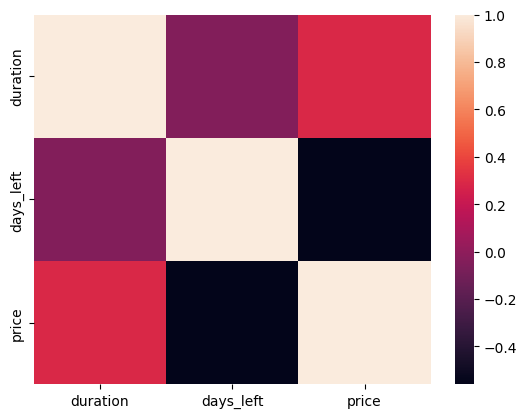

In [114]:
# seaborn

import seaborn as sns
heat=df_eco.corr()
sns.heatmap(heat)